<a id='top'></a>

# CSCI3022 S21
# Homework 2: Data Wrangling and Visualizations
***

**Name**: Carson Syberg

***

This assignment is due on Canvas by **MIDNIGHT on Monday, February 8**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 95 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) |
---

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

[Back to top](#top)

<a id='p1'></a>

## (25 pts) Problem 1: Data (Probability and Histograms)
*** 
The sinking of the RMS Titanic was a terrible tragedy that saw the loss of many lives. Even within this tragedy, thanks to the combinations of the records of the White Star Line and the thorough nature of follow-up research after the accident we have some records that can help us try to piece together the course of events on board the ship. Many of the historians and other researchers who have investigated this event have speculated as to what exactly happened.

We have the data on survival rates by class, gender, and age, so let's figure out whether there is evidence for some of these scenarios. Access the Titanic data in `titanic_data.csv` and store it in a Pandas DataFrame. The data contains information pertaining to class status (**Pclass**), survival (**Survived**), and gender (**Sex**) of passengers, among other things. Be sure to use the `titanic_data.csv` data set, *not* the `clean_titanic_data` file or `dirty_titanic_data` file from the in-class notebook exercises.

In [4]:
filepath = '../Data/titanic_data.csv'
df = pd.read_csv(filepath)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S


**Part A**:
Based on the overall population of passengers, report the probability of survival.

$$P(Survived=1)$$

In [5]:
# Based on overall population of passengers, report probability of survival

# prob of survival = number of survivors / number of total passengers
survivors = df['Survived'].sum() # number of survivors
total = len(df) # total num of passengers is length of the data frame
pSurvived = survivors / total
print("Probability of Survival: ", pSurvived)

Probability of Survival:  0.39281705948372614


**Part B**: 
Some claim that the final hours aboard the RMS Titanic were marked by "class warfare" in which the people with first-class tickets took all the good spots on the lifeboats; others claim that the final hours were characterized by male chivalry, in which the men valiantly gave up their positions in the boats and succumbed bravely to the depths of the Atlantic. 

Consider the two claims: class warfare, and male chivalry. Suppose that class warfare occurred in the final hours aboard the Titanic.  What patterns might you expect to see in the data?  Suppose that male chivalry was widespread during the final hours instead. What patterns might you then expect to see in the data?  Explain both of these hypothesized patterns in words. Are these two hypotheses mutually exclusive or not?

**Response to Part B:**

If class warfare had occurred in the final hours aboard the Titanic, it would mean that more first-class passengers made it to life boats than passengers with cheaper tickets, and would lead to a higher number of first-class survivors. If instead it was male chivalry at the end, I would expect to see a lower survival probability among men and higher among women and children. These two hypotheses are not mutually exclusive because the two events could have both happened at the same time. The combination of these two events would lead to first-class men having a higher survival probability than lower-class men and first-class women and children having a higher survival probability than lower-class women and children, but all men would have a lower survival probability than all women and children. 

**Part C**: Use Pandas methods to create a clean data set by removing any rows from the DataFrame that are missing values corresponding to **Survived**, **Pclass**, **Age**, or **Sex**. Store the clean data in a DataFrame called dfTitanic. Be sure to show any exploratory work determining if/where there are rows with missing values. _HINT: There should be 714 rows in your cleaned data set._

In [6]:
# remove any rows from the df that are missing values in "Survived" "Pclass" "Age" or "Sex"

# creates new column in the df to track if the row has a bad value in it
df['is_bad_data'] = df['Survived'].apply(lambda s: 1 if pd.isnull(s) else 0)
df['is_bad_data'] = df.loc[:, 'is_bad_data'] + df['Pclass'].apply(lambda s: 1 if pd.isnull(s) else 0)
df['is_bad_data'] = df.loc[:, 'is_bad_data'] + df['Age'].apply(lambda s: 1 if pd.isnull(s) else 0)
df['is_bad_data'] = df.loc[:, 'is_bad_data'] + df['Sex'].apply(lambda s: 1 if pd.isnull(s) else 0)

# used this website for help on getting indices of the df
# https://www.kite.com/python/answers/how-to-get-the-indices-of-rows-in-a-pandas-dataframe-which-satisfy-a-given-condition-in-python
index = df.index
condition = df['is_bad_data'] == 1
bad_data_indices = index[condition]

bad_data_indices = bad_data_indices.tolist()

for i in bad_data_indices:
    df = df.drop(i)
    
print("New length of df: ", len(df))

New length of df:  714


**Part D**: Compute the probability of survival according to class, gender, and all combinations of the two variables.  Then, answer the following questions:
* **(i)** When reviewing class survival probability, how do the results compare to the base survival probability results from **Part A**?
* **(ii)** When reviewing gender survival probability, how do the results compare to the base survival probability results from **Part A**?
* **(iii)** Within each passenger class, were men or women more/less/equally likely to survive?
* **(iv)**  Did men in first class or women in third class have a higher survival probability?


In [7]:
total = len(df) # total num of passengers is length of the data frame
# Compute prob of survival according to class
# first class has x% rate
# prob of survival = number of survivors / number of total passengers
first_survivors = df.loc[df['Pclass'] == 1, 'Survived'].sum() # number of survivors
total1 = len(df.loc[df['Pclass'] == 1])
pFirstSurvived = first_survivors / total1

# second class has x% rate
second_survivors = df.loc[df['Pclass'] == 2, 'Survived'].sum() # number of survivors
total2 = len(df.loc[df['Pclass'] == 2])
pSecondSurvived = second_survivors / total2

# third class has x% rate etc...
third_survivors = df.loc[df['Pclass'] == 3, 'Survived'].sum() # number of survivors
total3 = len(df.loc[df['Pclass'] == 3])
pThirdSurvived = third_survivors / total3


# Compute prob of survival according to gender
# men have x% rate
men_survivors = df.loc[df['Sex'] == 'male', 'Survived'].sum() # number of survivors
totalM = len(df.loc[df['Sex'] == 'male'])
pMenSurvived = men_survivors / totalM

# women have x% rate
women_survivors = df.loc[df['Sex'] == 'female', 'Survived'].sum() # number of survivors
totalF = len(df.loc[df['Sex'] == 'female'])
pWomenSurvived = women_survivors / totalF

# Compute prob of survival for combinations of the two variables
# first class men
_firstMen = df.loc[df['Pclass'] == 1, 'Survived'] # number of survivors
firstMen = _firstMen.loc[df['Sex'] == 'male'].sum()
_total1M = df.loc[df['Pclass'] == 1]
total1M = len(_total1M.loc[df['Sex'] == 'male'])
pFirstMen = firstMen / total1M

# # first class women
_firstWomen = df.loc[df['Pclass'] == 1, 'Survived'] # number of survivors
firstWomen = _firstWomen.loc[df['Sex'] == 'female'].sum()
_total1W = df.loc[df['Pclass'] == 1]
total1W = len(_total1W.loc[df['Sex'] == 'female'])
pFirstWomen = firstWomen / total1W

# # 2nd class men
_secondMen = df.loc[df['Pclass'] == 2, 'Survived'] # number of survivors
secondMen = _secondMen.loc[df['Sex'] == 'male'].sum()
_total2M = df.loc[df['Pclass'] == 2]
total2M = len(_total2M.loc[df['Sex'] == 'male'])
pSecondMen = secondMen / total2M

# # 2nd class women
_secondWomen = df.loc[df['Pclass'] == 2, 'Survived'] # number of survivors
secondWomen = _secondWomen.loc[df['Sex'] == 'female'].sum()
_total2W = df.loc[df['Pclass'] == 2]
total2W = len(_total2W.loc[df['Sex'] == 'female'])
pSecondWomen = secondWomen / total2W

# # 3rd class men
_thirdMen = df.loc[df['Pclass'] == 3, 'Survived'] # number of survivors
thirdMen = _thirdMen.loc[df['Sex'] == 'male'].sum()
_total3M = df.loc[df['Pclass'] == 3]
total3M = len(_total3M.loc[df['Sex'] == 'male'])
pThirdMen = thirdMen / total3M

# # 3rd class women
_thirdWomen = df.loc[df['Pclass'] == 3, 'Survived'] # number of survivors
thirdWomen = _thirdWomen.loc[df['Sex'] == 'female'].sum()
_total3W = df.loc[df['Pclass'] == 3]
total3W = len(_total3W.loc[df['Sex'] == 'female'])
pThirdWomen = thirdWomen / total3W
    
print("First Class Survival Probability: ", pFirstSurvived)
print("Second Class Survival Probability: ", pSecondSurvived)
print("Third Class Survival Probability: ", pThirdSurvived)
print("Male Survival Probability: ", pMenSurvived)
print("Female Survival Probability: ", pWomenSurvived)
print("First Class Male Survival Probability: ", pFirstMen)
print("Second Class Male Survival Probability: ", pSecondMen)
print("Third Class Male Survival Probability: ", pThirdMen)
print("First Class Female Survival Probability: ", pFirstWomen)
print("Second Class Female Survival Probability: ", pSecondWomen)
print("Third Class Female Survival Probability: ", pThirdWomen)

First Class Survival Probability:  0.6428571428571429
Second Class Survival Probability:  0.4827586206896552
Third Class Survival Probability:  0.2518703241895262
Male Survival Probability:  0.19654427645788336
Female Survival Probability:  0.749003984063745
First Class Male Survival Probability:  0.3870967741935484
Second Class Male Survival Probability:  0.1839080459770115
Third Class Male Survival Probability:  0.13780918727915195
First Class Female Survival Probability:  0.96
Second Class Female Survival Probability:  0.9310344827586207
Third Class Female Survival Probability:  0.5254237288135594


**Response to Part D**
* **(i)** When reviewing class survival probability, how do the results compare to the base survival probability results from **Part A**?

The base survival probability is about 0.39, this value is much less than the first class survival probability of 0.64. 

* **(ii)** When reviewing gender survival probability, how do the results compare to the base survival probability results from **Part A**?

In reviewing gender survival probability, women survived with probability 0.74 and men survived with probability 0.20. The female value was greater than the base while the male value was less than the base. 

* **(iii)** Within each passenger class, were men or women more/less/equally likely to survive?

Within each passenger class, women were more likely to survive. In first class, the men survived with probability 0.39 while the women survived with probability 0.96. In second class, the men survived with 0.18 while the women survived with 0.93. Lastly, in the third class men survived with 0.14 and women survived with 0.53. 

* **(iv)**  Did men in first class or women in third class have a higher survival probability?

First class men had a survival probability of 0.39 while third class women had a survival probability of 0.53, so third class women had a higher survival probability. 

**Part E**: One might wonder how a passenger's age is related to the likelihood that they would survive the Titanic disaster. In addition to the "male chivalry" argument outlined above, you can perhaps imagine an addendum - "women and children first!" - as the cry to ring out across the decks. Or you might imagine the opposite - rather than "class warfare", it is simply healthy adults fighting to take lifeboat spots for themselves.

To answer this question graphically, plot two density histograms on the same set of axes, showing the distribution of the ages of passengers who survived, and the distribution of the ages of passengers who did not. 
* Use the bin edges $[0,5,10,\ldots,70,75,80]$ for both histograms.
* To better distinguish between our populations, we will represent survivors with `navy` (as they were eventually rescued by ships) and those who passed away with `sandybrown`.
* Plot both histograms on a single set of axes (there should be only one panel in the figure you create), but use Matplotlib/Pandas plotting functionality to make the faces of the histogram boxes somewhat transparent, so both histograms are visible.
* Include a legend and label your axes.
* Comment on the results. Does your figure suggest that some age ranges are more or less likely to have survived the disaster than other ages? Fully explain your reasoning and use your figure to justify your conclusions.
* If you noticed some relationship between age and likelihood of survival, what is one possible explanation?

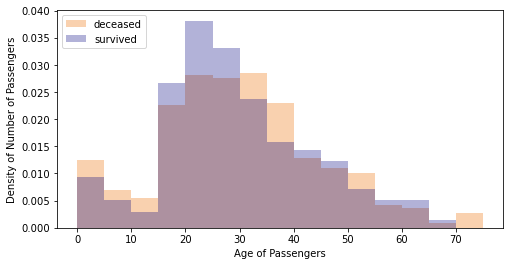

In [8]:
my_bins = range(0,80,5)

# need to reset index after removing bad data
df = df.reset_index()

live_index = df.index
live_condition = df['Survived'] == 1
live_indices = live_index[live_condition]

live_indices = live_indices.tolist()

d_index = df.index
d_condition = df['Survived'] == 0
d_indices = d_index[d_condition]

d_indices = d_indices.tolist()

# # seperate into survivors and deceased
survivors = df.iloc[live_indices]
deceased = df.iloc[d_indices]

# # Init figure
fig, ax = plt.subplots(figsize=(8,4))

#plot1 = survivors.hist(column="Age", ax=ax, bins=my_bins, facecolor='navy')
#plot2 = deceased.hist(column="Age", ax=ax, bins=my_bins, facecolor='sandybrown')

# plot two histograms on same set of axes (show distribution of ages of survivors and distribution of ages of the deceased)
#ax.stackplots(plot1, plot2, labels=['plot1', 'plot2'])
plt.hist(deceased['Age'], my_bins, density = True, alpha = 0.5, color = 'sandybrown', label = 'deceased')
plt.hist(survivors['Age'], my_bins, density = True, alpha = 0.3, color = 'navy', label = 'survived')
# use given bins
# make survivors navy and deceased sandybrown
# make faces of histogram boxes somewhat transparent

# include legend / axes labels
ax.legend(loc='upper left');
ax.set_ylabel('Density of Number of Passengers');
ax.set_xlabel('Age of Passengers');


# comment on results below

* Does your figure suggest that some age ranges are more or less likely to have survived the disaster than other ages? Fully explain your reasoning and use your figure to justify your conclusions.

This figure suggests that those from the ages of 15 to 30 are more likely than the other ages to have survived the disaster. 
As shown in the figure, the density histogram for survivors has its largest values in the interval of 15 to 30 where it also surpasses the deceased histogram showing that for people aged 15 to 30, a higher density of them survived than did not. The figure also shows that children, 30 to 40 year olds, 50 to 55 year olds, and 70 to 75 year olds, had a higher deceased density than survival density, suggesting that being outside of the 15 to 30 year old range leads to less likely survival. 

* If you noticed some relationship between age and likelihood of survival, what is one possible explanation?

I think a possible explanation between age and likelihood of survival is general health. A 20 year old will be much better able to survive treading in freezing water than a young child or an old person. 

** ** 


**Part F:** In Part E, we plotted two *density* histograms, showing the distributions of ages of passengers that survived or did not survive the Titanic disaster. Why would it be misleading for us to have plotted these as *frequency* histograms instead?

**Response to Part F**\
It would be misleading to plot these as frequency histograms instead because that plot would not be balanced based on population. In the ranges of 15 to 30 there are a large amount of people so on the frequency plot it would show their deceased histogram as much higher than the rest suggesting this group is more at risk than the others for not surviving. By using a density plot, the bins are normalized to show how the different groups stack up based on their differing population counts. 

**Part G**: Do the data suggest class warfare, male chivalry, age bias, or some combination of these characteristics in the final hours aboard the Titanic?  Justify your conclusions based on the computations done above, or do any other analysis that you like, but be sure to clearly justify your conclusions.

**Response to Part G**\
The data does suggest class warfare, as the probabilit of first class survival was 0.64, second class was 0.48 and third class was 0.25. The data also suggests male chivalry, as overall male survival probability was 0.20 while female was 0.75. Another piece of evidence for male chivalry and not class warfare, is that first class males had a lower survival rate than third class females. Age bias played a role as well, as out of the groups of people aged 15 to 30, there was a higher percentage of survival than other groups. There was also just a larger number of people in that age range which could also have lead to the higher chance of survival. 

[Back to top](#top)
<a/ id='p2'></a>

## (20 pts) Problem 2: Data (Box Plots and Outliers)
***

NOAA's Physical Sciences division (https://www.esrl.noaa.gov/psd) houses an enormous amount of weather data.  Load `BoulderPrecip.csv` from the course page for the last 120 years of monthly precipitation data from Boulder.  Let's take a look!

In [84]:
dfPrecip = pd.read_csv('../Data/boulder_precip_12021.csv')
dfPrecip.head()


,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR TOTAL
0,1900,0.40,1.06,0.75,9.18,1.84,0.49,0.48,0.22,1.54,0.13,0.19,0.61,16.89
1,1901,0.53,0.30,1.74,3.51,1.62,1.76,0.46,1.69,0.16,0.65,Tr,1.43,13.85
2,1902,0.37,0.48,1.48,1.01,2.32,1.46,1.26,0.53,5.46,1.44,1.29,1.34,18.44
3,1903,0.08,1.52,1.45,2.31,2.02,1.87,0.95,1.46,1.31,3.43,0.15,0.16,16.71
4,1904,0.09,0.31,2.37,1.45,5.35,2.72,1.05,1.00,1.60,1.06,0.08,0.70,17.78


**Part A:** SCRUBBING!  Our data set is going to be tough to use for a few reasons.

1) When the amount of precipitation was nonzero but too small to be recorded, this data set recorded `tr`.  Replace these with zeroes.

2) 2021 isn't over yet!  We have one row at the bottom that isn't fully complete and blank values are filling the months that haven't happened yet.  This can wreak havoc on some of our methods!  **Drop** the 2021 data entirely.

3) You may have some object typing issues relating to columns that contained both "Tr"/"NA" and numeric values.  Ensure that Python is treating all of your data as numeric! (see `df.dtypes`)

In [85]:
# go through whole dataframe and replace all instances of tr with 0
dfPrecip = dfPrecip.replace(to_replace='Tr', value = 0)

# drop all data with 'Year' == 2021
drop_indices = dfPrecip.index[dfPrecip['Year'] == 2021]
drop_indices = drop_indices.tolist()

for i in drop_indices:
    dfPrecip = dfPrecip.drop(i)

# Do this I had to iterate through each column and use df[column].str.replace('*',''), then convert to floats. 
columns = ['JAN', 'FEB', 'MAY', 'JUN', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

for c in columns:
    dfPrecip[c] = dfPrecip[c].str.replace('*','')

dfPrecip = dfPrecip.astype({'JAN':'float64', 'FEB':'float64', 'MAY':'float64', 'JUN':'float64', 'AUG':'float64', 'SEP':'float64','OCT':'float64','NOV':'float64','DEC':'float64'});

**Part B:** Generate a series of 12 box plots with month as the x axis and precipitation on the y-axis.

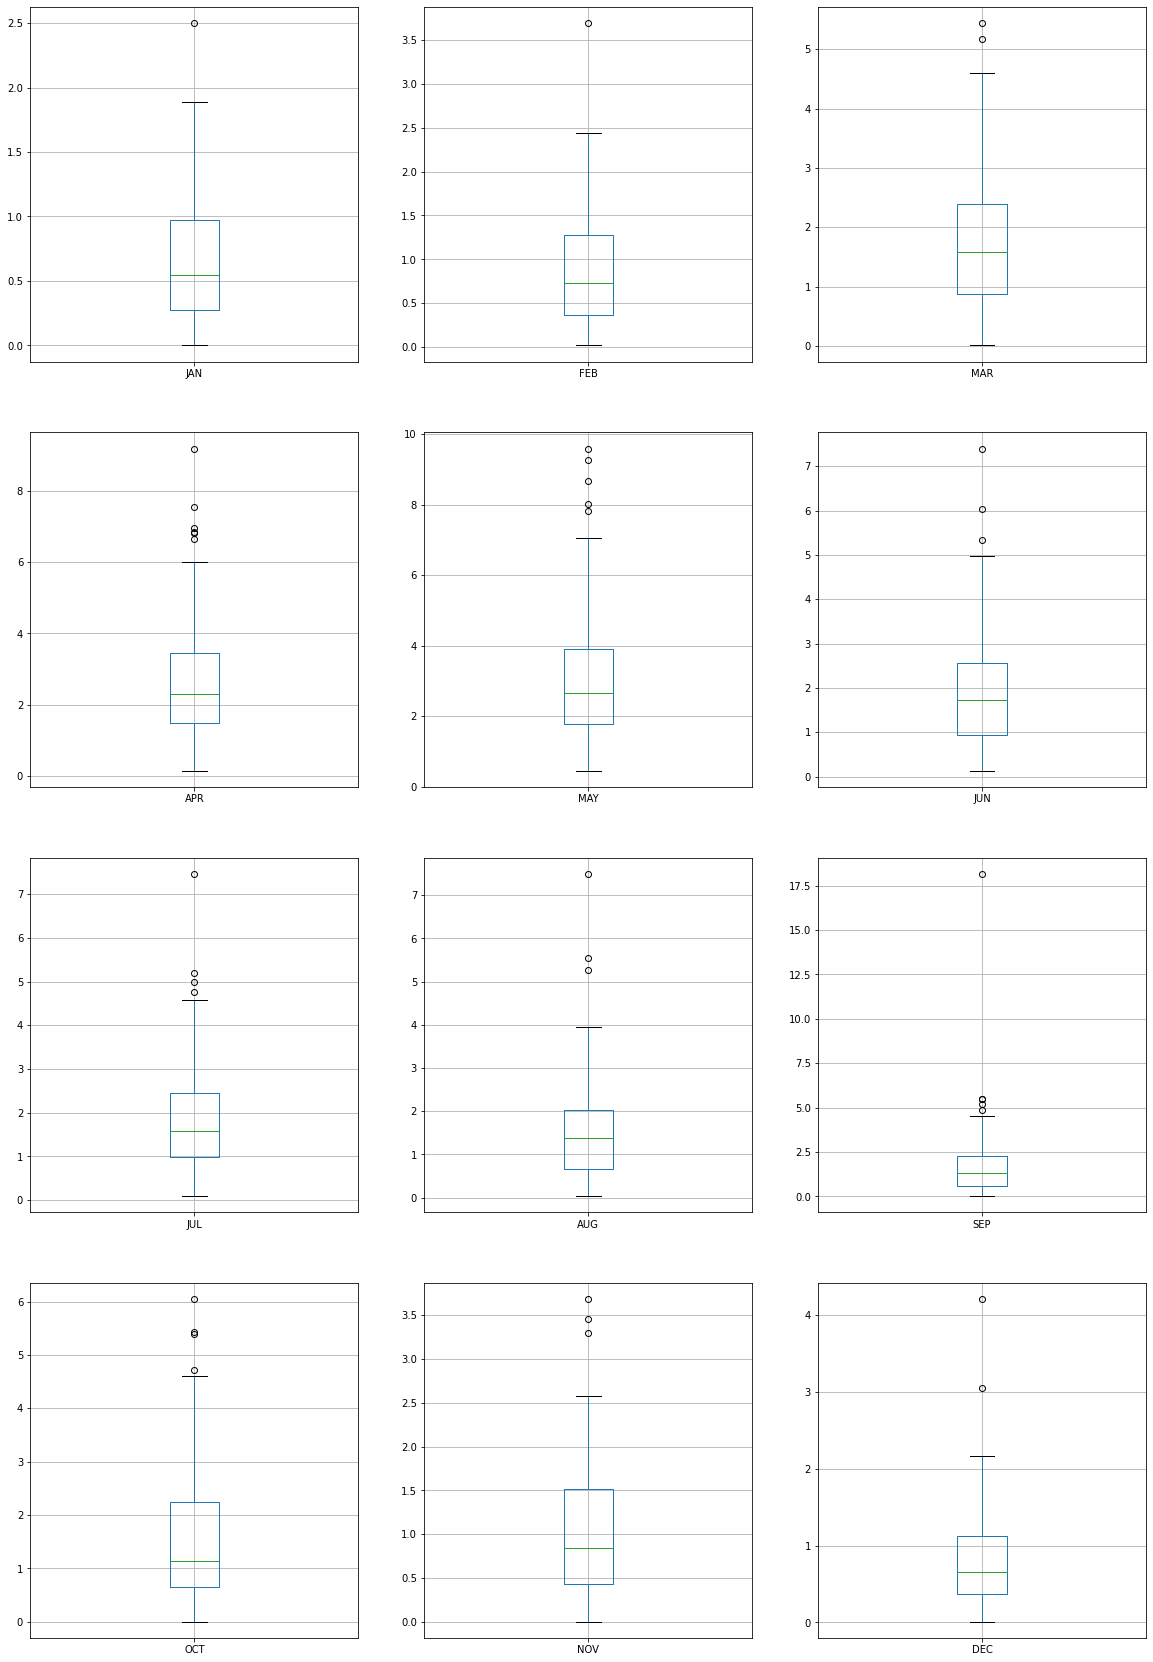

In [129]:
# X-axis is month, Y-axis is precipitation
plt.figure(figsize=(20, 30))
ax_1 = plt.subplot2grid((4,3), (0,0))
ax_2 = plt.subplot2grid((4,3), (0, 1))
ax_3 = plt.subplot2grid((4,3), (0, 2))
ax_4 = plt.subplot2grid((4,3), (1, 0))
ax_5 = plt.subplot2grid((4,3), (1, 1))
ax_6 = plt.subplot2grid((4,3), (1, 2))
ax_7 = plt.subplot2grid((4,3), (2, 0))
ax_8 = plt.subplot2grid((4,3), (2, 1))
ax_9 = plt.subplot2grid((4,3), (2, 2))
ax_10 = plt.subplot2grid((4,3), (3, 0))
ax_11 = plt.subplot2grid((4,3), (3, 1))
ax_12 = plt.subplot2grid((4,3), (3, 2))

# JAN
dfPrecip.boxplot(column='JAN', ax=ax_1)

# FEB
dfPrecip.boxplot(column='FEB', ax=ax_2)

# MAR
dfPrecip.boxplot(column='MAR', ax=ax_3)

# APR
dfPrecip.boxplot(column='APR', ax=ax_4)

# MAY
dfPrecip.boxplot(column='MAY', ax=ax_5)

# JUN
dfPrecip.boxplot(column='JUN', ax=ax_6)

# JUL
dfPrecip.boxplot(column='JUL', ax=ax_7)

# AUG
dfPrecip.boxplot(column='AUG', ax=ax_8)

# SEP
dfPrecip.boxplot(column='SEP', ax=ax_9)

# OCT
dfPrecip.boxplot(column='OCT', ax=ax_10)

# NOV
dfPrecip.boxplot(column='NOV', ax=ax_11)

# DEC
dfPrecip.boxplot(column='DEC', ax=ax_12)


**Part C:** Spring is the wet season in Boulder.   But what is Spring?

Atmospheric scientists love to group months seasonally, breaking the year into a Winter season including December, January, February; a Spring including March, April, and May; and so forth.

The solar year, however, says that Spring runs from near the end of March until near the end of June: let's round at the nearest month and say that it includes the months of April, May and June.

Generate a box plot with precipitation on the y-axis and the two possible monthly 'Spring' groupings (March-May versus April-June) as the x-axis.

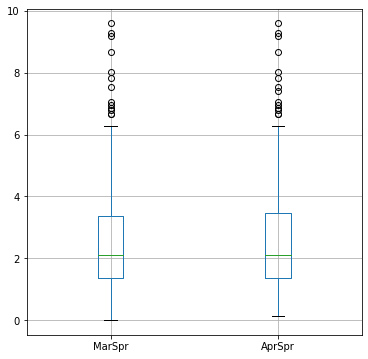

In [163]:
# Generate box plot with precipitation on y-axis and two differnet 'spring' versions on same x-axis
fig, ax_13 = plt.subplots(figsize=(6,6))

march_list = dfPrecip['MAR']
march_list = march_list.append(dfPrecip['APR'])
march_list = march_list.append(dfPrecip['MAY'])

april_list = dfPrecip['APR']
april_list = april_list.append(dfPrecip['MAY'])
april_list = april_list.append(dfPrecip['JUN'])

data = {'MarSpr': march_list, 'AprSpr': april_list}
df_plotting = pd.DataFrame(data, columns=['MarSpr', 'AprSpr'])
df_plotting = df_plotting.reset_index()

df_plotting.boxplot(column=['MarSpr', 'AprSpr'], ax=ax_13)

**Part D:** These might look pretty similar!  Highlight and comment on any differences by calculating the mean, standard deviation, and a Tukey five number summary of each classification of Spring.  Is there a reason here to favor one grouping over the other?

In [168]:
print(df_plotting['MarSpr'].describe(), '\n')

print(df_plotting['AprSpr'].describe())

count    362.000000
mean       2.515552
std        1.672429
min        0.010000
25%        1.370000
50%        2.115000
75%        3.362500
max        9.590000
Name: MarSpr, dtype: float64 

count    361.000000
mean       2.574515
std        1.696343
min        0.130000
25%        1.370000
50%        2.120000
75%        3.470000
max        9.590000
Name: AprSpr, dtype: float64


**Analysis to Part D**

The mean of the March-May spring was 2.52 while the mean of the April-June spring was 2.57. This difference suggests June must have a higher average precipitation than March, as it May and April are apart of each mean calculation. 

The Tukey five number summary for March-May was a min of 0.01, quartiles of 1.37, 2.11, and 3.36, and a max of 9.60. For April-June it had a min of 0.13, quartiles of 1.37, 2.12, and 3.47, and a max of 9.60. These values for the two springs are similar, except that March-May had a much lower minimum of 0.01 while April-June had a higher minimum of 0.13.

The standard deviation for March-May was 1.67 while the standard deviation for April-June was 1.70. March-May having a lower standard deviation is a reason to favor that grouping because it means there will be less skewing from extreme data points. 

**Part E:** Create a density histogram of the September precipitation.  Classify and describe this histogram, including discussion of any skewness, multimodality, or outliers.  Find the data point associated with September, 2013, and recreate your histogram with that value in a different color or otherwise clearly marked.

Sep 2013:  113    18.16
Name: SEP, dtype: float64


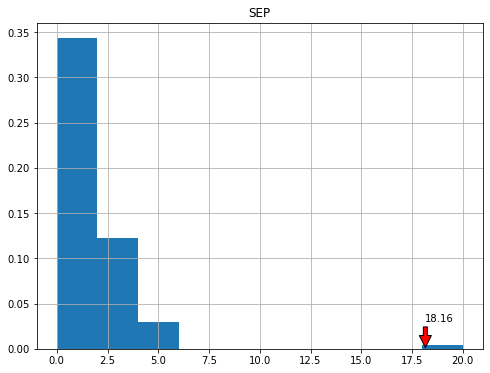

In [203]:
# create density histogram of SEP
fig_4, ax_14 = plt.subplots(figsize=(8,6));

dfPrecip.hist(column='SEP', ax=ax_14, bins=range(0, 22, 2), density=True);

desired_year = dfPrecip.loc[dfPrecip['Year'] == 2013];
desired_point = desired_year['SEP'];
print("Sep 2013: ", desired_point);

ax_14.annotate('18.16', xy=(18.16, 0), xytext=(18.16,0.03), arrowprops = dict(facecolor='red', shrink=0.05));
# find data point with SEP 2013 and recreate histogram with that value in a different color or marked on it

**Analysis for Part E**

This histogram has positive skew, as its outlier is a large positive number, 18.16. Because of the outlier it could be argued that this histogram is bimodal. For bimodality, there must be more than one local maximum, and although the outlier is much lower than the peak of the first portion of the histogram, it is still higher than the bins around it, and if drawing a curve to fit this histogram, there would be two bumps, one at the early values less than 2.5 and a much smaller bump near the 18.16 value. 

**Part F:** That one data point in September 2013 is pretty out there!  Compute the mean and standard deviation of the September precipitation values, then compute them again while excluding the 2013 observation.  How much did each change?

If someone were to ask you about the average weather in September, what would you respond?



In [221]:
dfSep = dfPrecip[['SEP', 'Year']]
print("With 2013 Mean: ", dfSep['SEP'].mean())
print("With 2013 Std: ", dfSep['SEP'].std(), '\n')

dfSep = dfSep.drop(dfSep.index[dfSep['Year'] == 2013])
print("Without 2013 Mean: ", dfSep['SEP'].mean())
print("Without 2013 Std: ", dfSep['SEP'].std())


With 2013 Mean:  1.7313559322033893
With 2013 Std:  1.9814752836156935 

Without 2013 Mean:  1.5909401709401705
Without 2013 Std:  1.270227364188968


**Analysis for Part F**

The mean decreased by 0.14 and the standard deviation decreased by 0.71. 
If someone were to ask me about average weather in September I would use the mean calculated without the extreme point because the odds of the outlier happening are much lower than the other points, so the points that are likely to happen are what give the best idea of what the precipitation will truly be like. 

[Back to top](#top)